# Dimensionality Reduction

Dimensionality reduction is a means of projecting high-dimensional data into a low-dimensional space. This can be coupled with unsupervised machine learning techniques to determine data classification. This tutorial will explore Principal Component Analysis (PCA) and a follow up will explore Uniform Manifold Approximation and Projection (UMAP).



## Principal Component Analysis

Principal component analysis (PCA) decomposes high-dimensional data sets by breaking it into orthogonal components and measuring the variance captured. In some cases, two components can capture a large percentage of the variance, in other cases ten (or more) components may be required to capture the variance. This method in its original form tends to work for finding outliers in the dataset, but is not suited for finding nuanced differences. There are many extensions of PCA which will not be covered here.

This tutorial is a simplified version of the tutorial found here: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

### Iris Dataset PCA Example

First, import the proper packages. For this tutorial we are using scikit-learn datasets and the scikit-learn PCA projection. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

Next, load the dataset and specify data, target, and target names. For this tutorial we are using a dataset comprised of information about 150 Iris flowers including four pieces of information for each flower (sepal length, sepal width, petal length, and petal width) and designating which type of Iris (Setosa, Versicolour, and Virginica.) 

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

Now that the data is loaded, we can perform PCA. The function only needs to know the number of components to keep (n_components). This value can range anywhere from 1 to the number of features. In this case we are bounded by a feature vector containing 4 elements. To start, we will reduce to 2 dimensions. 

In [42]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

After the data reduction, we can check how much variance is captured by these two principal components.

In [43]:
# Percentage of variance explained for each components
print('Explained Variance Ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

print('Total Variance Captured: ',np.around(sum(pca.explained_variance_ratio_)*100,2),'%')

Explained Variance Ratio (first two components): [0.92461872 0.05306648]
Total Variance Captured:  97.77 %


Let's check to see what happens if we increase n_components to 3.

In [6]:
pca = PCA(n_components=3)
pca.fit(X).transform(X)

print('Explained Variance Ratio (three components): %s'
      % str(pca.explained_variance_ratio_))

print('Total Variance Captured: ',np.around(sum(pca.explained_variance_ratio_)*100,2),'%')

Explained Variance Ratio (three components): [0.92461872 0.05306648 0.01710261]
Total Variance Captured:  99.48 %


And what happens if we increase n_components to 4 (the number of features)? 

Running PCA with the number of features in your vector is redundant as it has no dimensional reduction. As you can see here, it captures 100% of the variance, but gains no advantage from a data science perspective.

In [7]:
pca = PCA(n_components=4)
pca.fit(X).transform(X)

print('Explained Variance Ratio (three components): %s'
      % str(pca.explained_variance_ratio_))

print('Total Variance Captured: ',np.around(sum(pca.explained_variance_ratio_)*100,2),'%')

Explained Variance Ratio (three components): [0.92461872 0.05306648 0.01710261 0.00521218]
Total Variance Captured:  100.0 %


Now let's visualize our reduction to 2 components and think about what a plot like this can potentially tell us. 

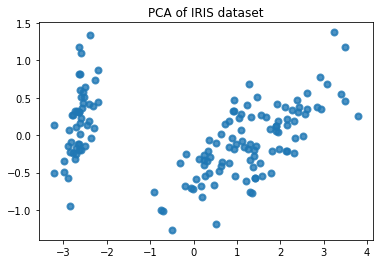

In [8]:
plt.figure()
lw = 2

plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.8, lw=lw)
plt.title('PCA of IRIS dataset')

plt.show()

Looks like a bunch of dots, right? Not the most useful without giving it some context. Remember in the beginning when we loaded the "target" and "target_names"? This tells us the type of iris for each data element (Setosa, Versicolour, and Virginica.)

Let's overlay that information on the plot. 

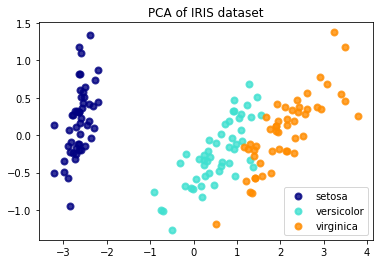

In [9]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


plt.show()

There we go! That tells us something! Based on the four pieces of information (sepal length, sepal width, petal length, and petal width) reduced to two dimensions we see the plot has groupings of each type of flower. 

Let's compare this to how the data looks when we plot each of the four attributes against the other attributes (aka the brute force way.) 

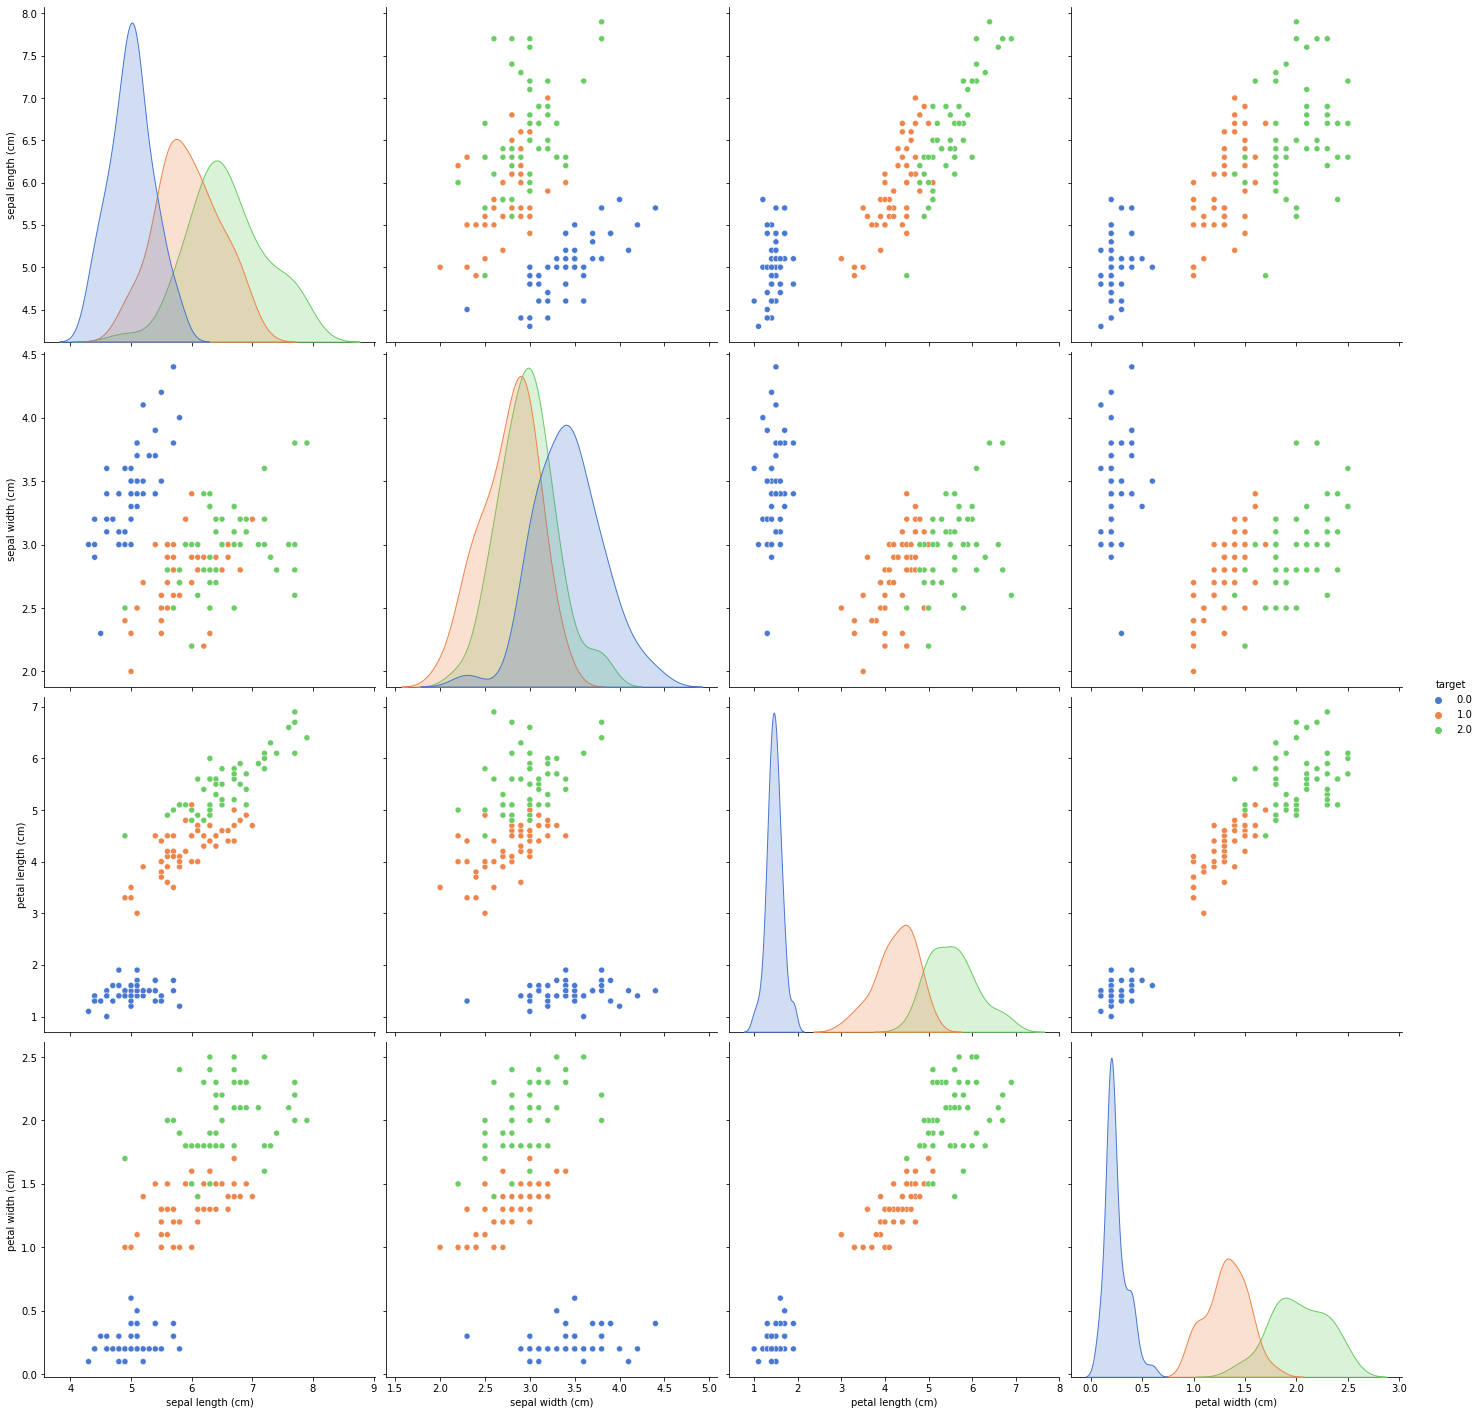

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

#note, there is a much better way write this plotting function, this was just a very quick and easy way I remembered
# 0 = 'setosa', 1 = 'versicolor', 2 = 'virginica'
a=sns.pairplot(iris_df,hue='target',palette="muted",height=5,vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],kind='scatter')
plt.show()


### KMeans Clustering

Now let's try out a way to cluster the PCA plot. For this we will use KMeans clustering which is a function also in scikit-learn. 

We are going to start with three clusters because that is the number of flower types we have. To use this we will call back X_r from our original dimensional reduction.

Portions of example found here: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_r)
y_kmeans = kmeans.predict(X_r)

We made the clusters, now let's see what it did. KMeans clustering determines a cluster center which are also plotted here shown by the large black dots.

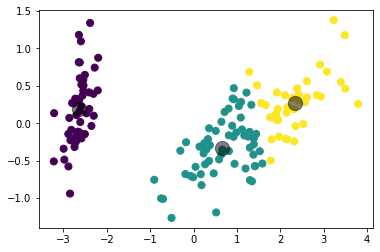

In [12]:
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()

Kind of neat, right? Let's see how these clusters compare to the species clusters. 

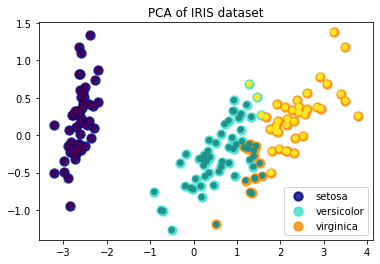

In [13]:
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, s = 70, alpha=.8, lw=lw,
                label=target_name)


plt.scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, s=30, cmap='viridis')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

Not too bad, right? Only a little bit of misclassifying happens between the Versicolor and Virginica. 

While a very simple example, this demonstrates an important note on dimensional reduction. Through this exercise with reduction and classifying, we would be able to predict the type of Iris solely based on four attributes and how they relate to other irises. 

## Extension: Overlaying other attribute values

Now that we have a firm grasp on general dimensional reduction, let's see what else we can do. When working with large datasets, you will often have human interpreted attributes. In this case, the features themselves are the attributes (Sepal length, sepal width, petal length, petal width). Let's overlay some color gradients to see how PCA organized according to these values.  

First, I will put the data in list form to reference for the colorplots. There are many ways to do this (and much more efficient ways) but this method is rather intuitive.

In [35]:
## There are many ways to do this. 
## I commonly use lists to overlay colormaps on my scatterplots so that is what I have done here.

data_list = []
sepal_len = []
sepal_wid = []
petal_len = []
petal_wid = []

#'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)

for i in range(0,150):
    data_list.append(iris["data"][i])
    sepal_len.append(data_list[i][0])
    sepal_wid.append(data_list[i][1])
    petal_len.append(data_list[i][2])
    petal_wid.append(data_list[i][3])

Next, plot the same scatterplot as before, but this time let's define a colormap and use the generated lists as the color. In this case I have chosen 'RdYlBu' as the colormap and added a colorbar on the side showing the values. 

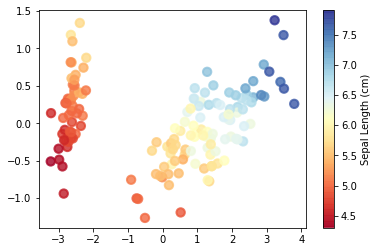

In [44]:
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X_r[:, 0], X_r[:, 1], c=sepal_len, s = 70, alpha=.8, lw=lw, cmap=cm)
plt.colorbar(label="Sepal Length (cm)")
plt.show()

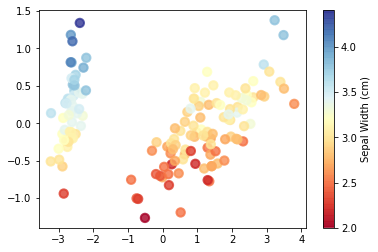

In [45]:
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X_r[:, 0], X_r[:, 1], c=sepal_wid, s = 70, alpha=.8, lw=lw, cmap=cm)
plt.colorbar(label="Sepal Width (cm)")
plt.show()

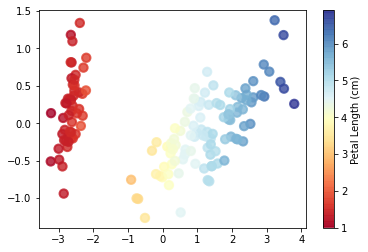

In [46]:
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X_r[:, 0], X_r[:, 1], c=petal_len, s = 70, alpha=.8, lw=lw, cmap=cm)
plt.colorbar(label="Petal Length (cm)")
plt.show()

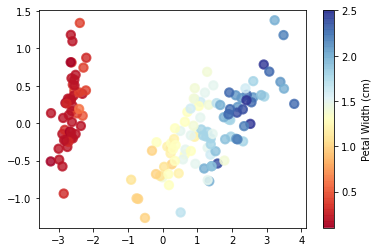

In [47]:
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X_r[:, 0], X_r[:, 1], c=petal_wid, s = 70, alpha=.8, lw=lw, cmap=cm)
plt.colorbar(label="Petal Width (cm)")
plt.show()

The examples above demonstrate more ways to view the data. Dimensional reduction can be a powerful tool for visualizing high dimensional data and seeing how various attributes are linked to one another. In the next tutorial we will explore UMAP and perform similar visualization exercises to see how the algorithms perform with the different datasets.